In [50]:
import sys
!{sys.executable} -m pip -q install palantir fa2

In [51]:
import warnings
warnings.filterwarnings("ignore")
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline

sc.set_figure_params()
scf.set_figure_pubready()

In [54]:
mg = sc.read_h5ad(r"/mnt/g/Levi_Jon/combined.h5ad")

In [112]:
mgtotal = sc.read_h5ad(r"/mnt/g/Levi_Jon/combined.h5ad")

In [230]:
mgtotal_early = sc.read_10x_h5(  #THIS IS EARLY
    '/mnt/g/Levi_Jon/early/outs/filtered_feature_bc_matrix.h5') 

reading /mnt/g/Levi_Jon/early/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


In [146]:
mgtotal = sc.read_10x_h5(  #THIS IS EARLY
    '/mnt/g/Levi_Jon/early/outs/filtered_feature_bc_matrix.h5')         

reading /mnt/g/Levi_Jon/early/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


In [220]:
mgtotal_late = sc.read_10x_h5('/mnt/g/Levi_Jon/late/Ascl1_Atoh1_late_timepoint/outs/filtered_feature_bc_matrix.h5')   

reading /mnt/g/Levi_Jon/late/Ascl1_Atoh1_late_timepoint/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


In [148]:
mgtotal.obs

""
AAACCCAAGCACTGGA-1
AAACCCACATCCGGCA-1
AAACCCAGTATTCCGA-1
AAACCCAGTGACTAAA-1
AAACCCAGTTACCTTT-1
...
TTTGTTGAGTGTCATC-1
TTTGTTGCAATTAGGA-1
TTTGTTGCAGTGCGCT-1
TTTGTTGGTCTGCGCA-1


In [216]:
mgtotal_late.obs

""
AAACCCAAGGGTTAGC-1
AAACCCAGTAGCTGCC-1
AAACCCAGTGAATTGA-1
AAACCCAGTGTTGAGG-1
AAACGAAAGCAACTCT-1
...
TTTGGTTCATCACAGT-1
TTTGGTTGTTAGGCTT-1
TTTGGTTTCGCAAGAG-1
TTTGGTTTCTGAGAGG-1


In [149]:
sc.pp.filter_genes(mgtotal,min_cells=3)
sc.pp.normalize_total(mgtotal)
sc.pp.log1p(mgtotal,base=10)
sc.pp.highly_variable_genes(mgtotal, n_top_genes=2000, flavor='cell_ranger')

filtered out 14484 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [144]:
mgtotal

AnnData object with n_obs × n_vars = 3684 × 17801
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [219]:
mgtotal_late

AnnData object with n_obs × n_vars = 2817 × 15283
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [56]:
import pandas as pd
mg.obs['seurat_clusters'] = mg.obs['seurat_clusters'].astype(str)
old_to_new = {
'0':'Transitory',
'1':'Transitory',
'2':'Transitory',
'3':'Transitory',
'4':'Partially muller glia',
'5':'Microglia',
'6':'RGC',
'7':'Cones',
'8':'Mature muller glia',
'9':'Transitory',
'10':'Early neurons'}
mg.obs['EK_anno'] = (
mg.obs['seurat_clusters']
.map(old_to_new).astype('category')
)

In [113]:
mgtotal.obs['seurat_clusters'] = mgtotal.obs['seurat_clusters'].astype(str)
old_to_new = {
'0':'Transitory',
'1':'Transitory',
'2':'Transitory',
'3':'Transitory',
'4':'Partially muller glia',
'5':'Microglia',
'6':'RGC',
'7':'Cones',
'8':'Mature muller glia',
'9':'Transitory',
'10':'Early neurons'}
mgtotal.obs['EK_anno'] = (
mgtotal.obs['seurat_clusters']
.map(old_to_new).astype('category')
)

In [13]:
mg.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.rb,S.Score,G2M.Score,Phase,percent.mt,RNA_snn_res.0.5,seurat_clusters,pANN_0.25_0.04_241,DF.classifications_0.25_0.04_241,DF.classifications_0.25_0.04_191,pANN_0.25_0.06_182,DF.classifications_0.25_0.06_182,DF.classifications_0.25_0.06_153,integrated_snn_res.0.5,EK_anno
AAACCCAGTAGCTGCC-1_1,late,1557.0,1027,11.368015,-0.027778,-0.033397,G1,4.945408,0,0,0.015504,Singlet,Singlet,NaN,NA,NA,0,Transitory
AAACCCAGTGTTGAGG-1_1,late,1139.0,763,1.053556,-0.000618,-0.010960,G1,10.711150,3,3,0.031008,Singlet,Singlet,NaN,NA,NA,3,Transitory
AAACGAAAGCAACTCT-1_1,late,2946.0,1756,7.399864,0.004769,-0.065160,S,4.073320,1,2,0.217054,Singlet,Singlet,NaN,NA,NA,2,Transitory
AAACGAACACATGTTG-1_1,late,931.0,621,1.611171,0.040806,-0.015264,S,3.866810,3,3,0.007752,Singlet,Singlet,NaN,NA,NA,3,Transitory
AAACGCTAGCTCTGTA-1_1,late,3233.0,1823,8.660687,-0.001237,0.142516,G2M,3.154964,1,1,0.155039,Singlet,Singlet,NaN,NA,NA,1,Transitory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTCCTCAGG-1_2,early,3166.0,1687,11.939356,-0.060528,0.077702,G2M,7.548958,2,4,NaN,NA,NA,0.006897,Singlet,Singlet,4,Partially muller glia
TTTGGTTTCTCTCCGA-1_2,early,4794.0,2441,9.198999,-0.013216,-0.055211,G1,6.633292,0,2,NaN,NA,NA,0.124138,Singlet,Singlet,2,Transitory
TTTGTTGAGGTCGACA-1_2,early,5595.0,2637,10.241287,-0.056890,-0.102094,G1,8.918677,8,9,NaN,NA,NA,0.213793,Singlet,Singlet,9,Transitory
TTTGTTGCAGTGCGCT-1_2,early,3848.0,1914,12.733888,0.054813,0.040794,S,8.030146,2,4,NaN,NA,NA,0.034483,Singlet,Singlet,4,Partially muller glia


In [58]:
mg = mg[mg.obs['EK_anno'].isin(['Transitory','Partially muller glia','RGC','Cones','Mature muller glia','Early neurons'])]

In [114]:
mgtotal = mgtotal[mgtotal.obs['EK_anno'].isin(['Transitory','Partially muller glia','RGC','Cones','AC','Mature muller glia','Early neurons'])]

In [16]:
mg.layers['scaled'] = sc.pp.scale(mg, copy=True).X

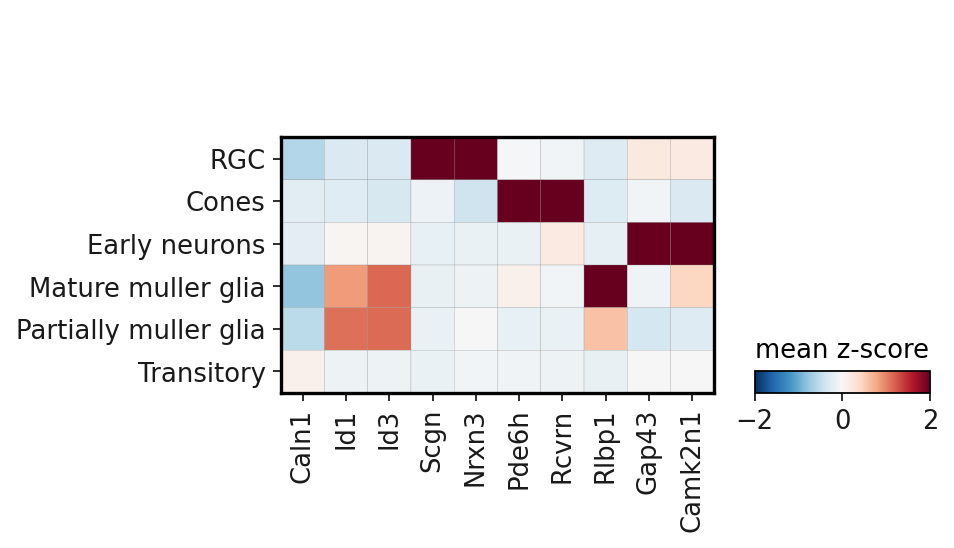

In [21]:
sc.pl.matrixplot(mg, ['Caln1','Id1','Id3','Scgn','Nrxn3','Pde6h','Rcvrn','Rlbp1','Gap43','Camk2n1'], 'EK_anno',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', categories_order = ['RGC','Cones','Early neurons','Mature muller glia','Partially muller glia',
                                                                                                                   'Transitory'])

In [251]:
sc.pl.matrixplot(mg, ['Scgn','Nrxn3','Pde6h','Rcvrn','Gap43','Camk2n1','Rlbp1','Id1','Id3','Caln1'], 'EK_anno',
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', categories_order = ['RGC','Cones','Early neurons','Mature muller glia','Partially muller glia',
                                                                                                                   'Transitory'])

KeyError: 'scaled'

In [116]:
sc.pp.filter_genes(mgtotal, min_counts=1)


filtered out 1174 genes that are detected in less than 1 counts


In [223]:
sc.pp.filter_genes(mgtotal_early, min_counts=1)

filtered out 11848 genes that are detected in less than 1 counts


In [117]:
sc.pp.highly_variable_genes(mgtotal, n_top_genes=2000, flavor='cell_ranger')

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
`n_top_genes` > `adata.n_var`, returning all genes.
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [224]:
sc.pp.highly_variable_genes(mgtotal_early, n_top_genes=2000, flavor='cell_ranger')

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [150]:
sc.pp.pca(mgtotal)
pca_projections = pd.DataFrame(mgtotal.obsm["X_pca"],index=mgtotal.obs_names)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [ ]:
###Start from here

In [241]:
sc.pp.filter_genes(mgtotal_late,min_cells=3)
sc.pp.normalize_total(mgtotal_late)
sc.pp.log1p(mgtotal_late,base=10)
sc.pp.highly_variable_genes(mgtotal_late, n_top_genes=2000, flavor='cell_ranger')

filtered out 17002 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [243]:
sc.pp.pca(mgtotal_late)
pca_projections = pd.DataFrame(mgtotal_late.obsm["X_pca"],index=mgtotal_late.obs_names)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [151]:
mgtotal.X

<3684x17801 sparse matrix of type '<class 'numpy.float32'>'
	with 8799934 stored elements in Compressed Sparse Row format>

In [232]:
mgtotal_early.X

<3684x17801 sparse matrix of type '<class 'numpy.float32'>'
	with 8799934 stored elements in Compressed Sparse Row format>

In [124]:
sc.pp.pca(mgtotal)
pca_projections = pd.DataFrame(mgtotal.obsm["X_pca"],index=mgtotal.obs_names)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [244]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=4)

Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [237]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=4)

Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [153]:
# generate neighbor draph in multiscale diffusion space
mgtotal.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(mgtotal,n_neighbors=30,use_rep="X_palantir")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [245]:
mgtotal_late.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(mgtotal_late,n_neighbors=30,use_rep="X_palantir")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [154]:
# draw ForceAtlas2 embedding using 3 first PCs as initial positions
mgtotal.obsm["X_pca2d"]=mgtotal.obsm["X_pca"][:,:3]
sc.tl.draw_graph(mgtotal, layout = 'fa',init_pos='X_pca2d')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:21)


In [246]:
# draw ForceAtlas2 embedding using 3 first PCs as initial positions
mgtotal_late.obsm["X_pca2d"]=mgtotal_late.obsm["X_pca"][:,:3]
sc.tl.draw_graph(mgtotal_late, layout = 'fa',init_pos='X_pca2d')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:15)


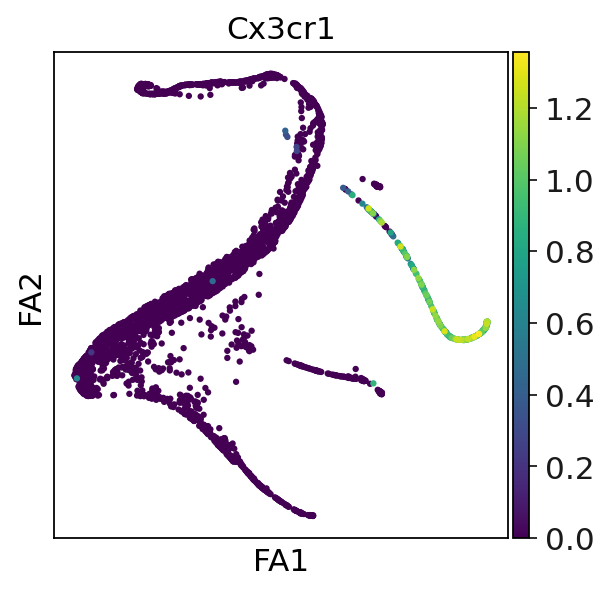

In [156]:
sc.pl.draw_graph(mgtotal,color=['Cx3cr1'], layout = 'fa') #WE USE THAT

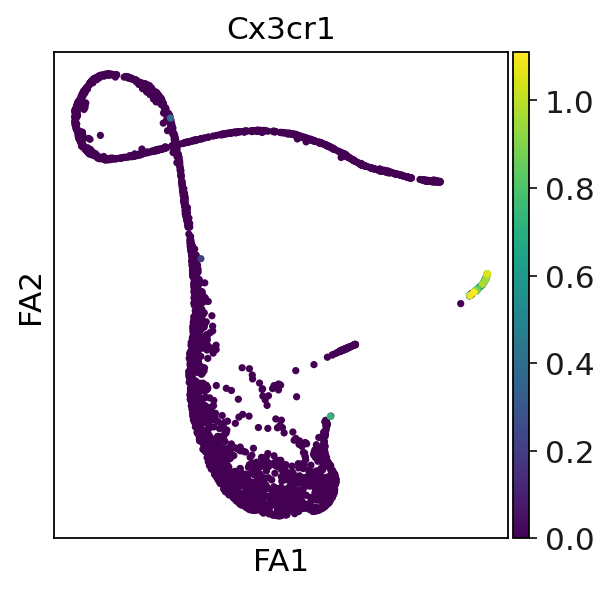

In [247]:
sc.pl.draw_graph(mgtotal_late,color=['Cx3cr1'], layout = 'fa') #WE USE THAT

In [157]:
sc.tl.leiden(mgtotal)

running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [248]:
sc.tl.leiden(mgtotal_late)

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


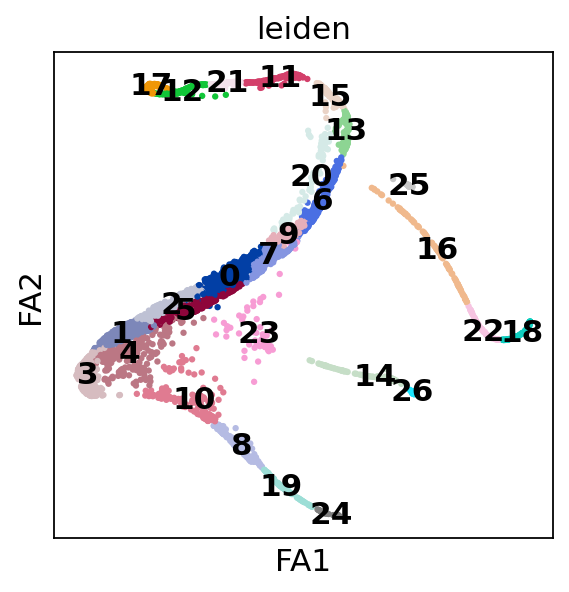

In [159]:
sc.pl.draw_graph(mgtotal,color=['leiden'], layout = 'fa', legend_loc = 'on data') #WE USE THAT

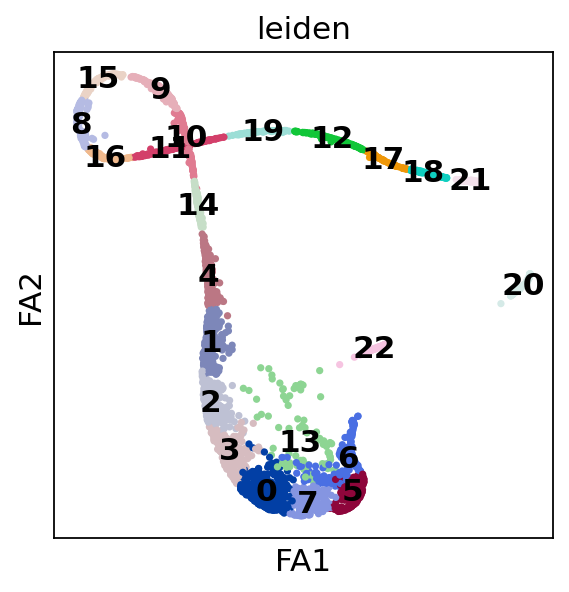

In [249]:
sc.pl.draw_graph(mgtotal_late,color=['leiden'], layout = 'fa', legend_loc = 'on data') #WE USE THAT

In [160]:
mgtotal.obs

,leiden
AAACCCAAGCACTGGA-1,11
AAACCCACATCCGGCA-1,8
AAACCCAGTATTCCGA-1,2
AAACCCAGTGACTAAA-1,14
AAACCCAGTTACCTTT-1,25
...,...
TTTGTTGAGTGTCATC-1,14
TTTGTTGCAATTAGGA-1,9
TTTGTTGCAGTGCGCT-1,12
TTTGTTGGTCTGCGCA-1,11


In [161]:
mgtotal = mgtotal[mgtotal.obs['leiden'].isin(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','17','19','20','21','23','24','26'])]

In [162]:
mgtotal.obs

,leiden
AAACCCAAGCACTGGA-1,11
AAACCCACATCCGGCA-1,8
AAACCCAGTATTCCGA-1,2
AAACCCAGTGACTAAA-1,14
AAACGAAAGGAAACGA-1,23
...,...
TTTGTTGAGTGTCATC-1,14
TTTGTTGCAATTAGGA-1,9
TTTGTTGCAGTGCGCT-1,12
TTTGTTGGTCTGCGCA-1,11


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:16)


KeyError: 'Could not find key seurat_clusters in .var_names or .obs.columns.'

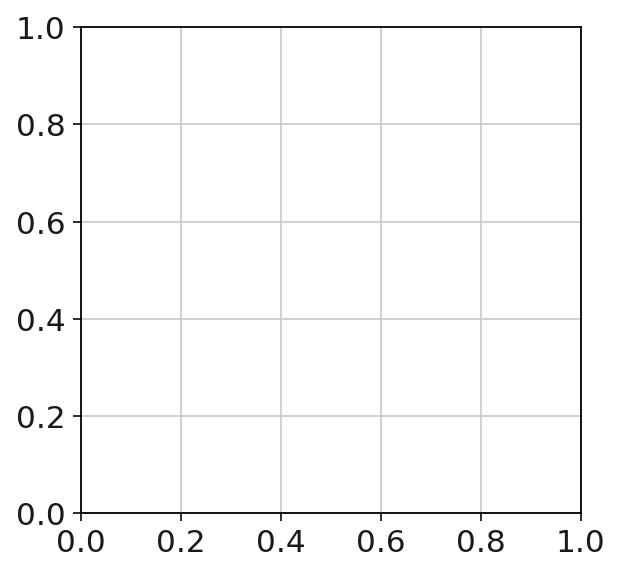

In [163]:
sc.pp.pca(mgtotal)
pca_projections = pd.DataFrame(mgtotal.obsm["X_pca"],index=mgtotal.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=4)
mgtotal.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(mgtotal,n_neighbors=30,use_rep="X_palantir")
mgtotal.obsm["X_pca2d"]=mgtotal.obsm["X_pca"][:,:3]
sc.tl.draw_graph(mgtotal, layout = 'fa',init_pos='X_pca2d')


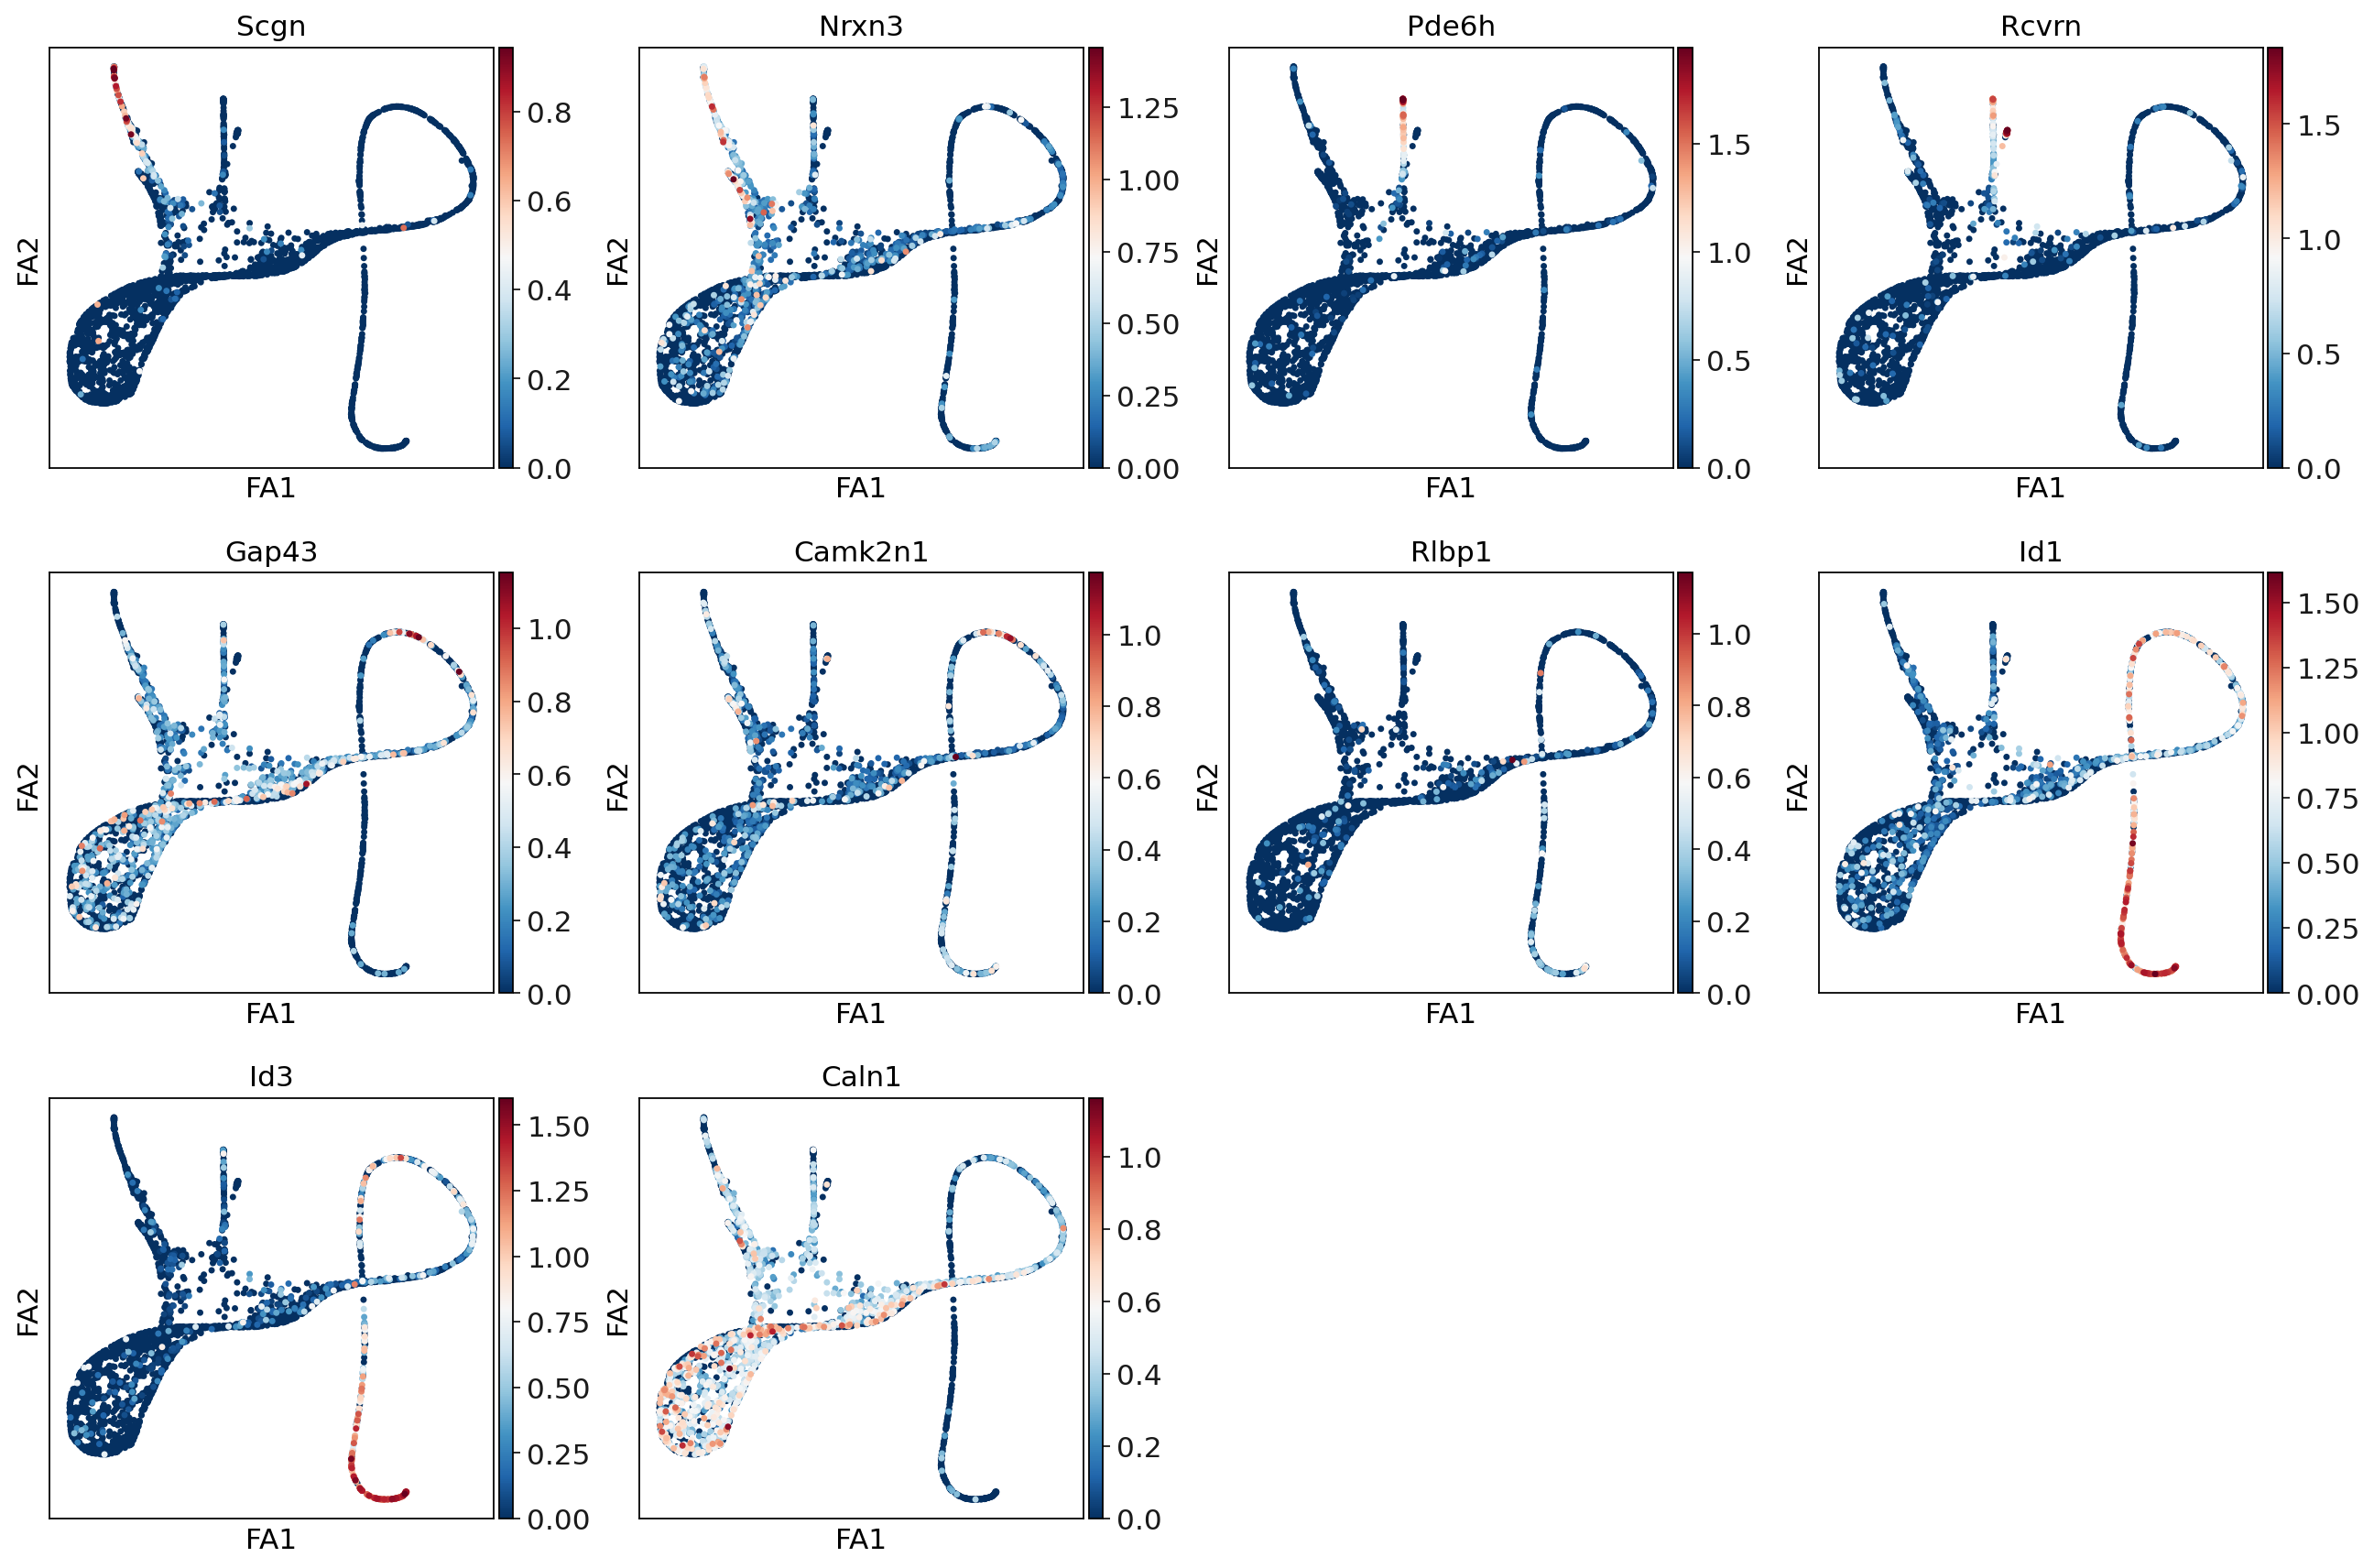

In [171]:
sc.set_figure_params()
sc.pl.draw_graph(mgtotal,color=['Scgn','Nrxn3','Pde6h','Rcvrn','Gap43','Camk2n1','Rlbp1','Id1','Id3','Caln1'], use_raw = False, layout = 'fa',color_map="RdBu_r")

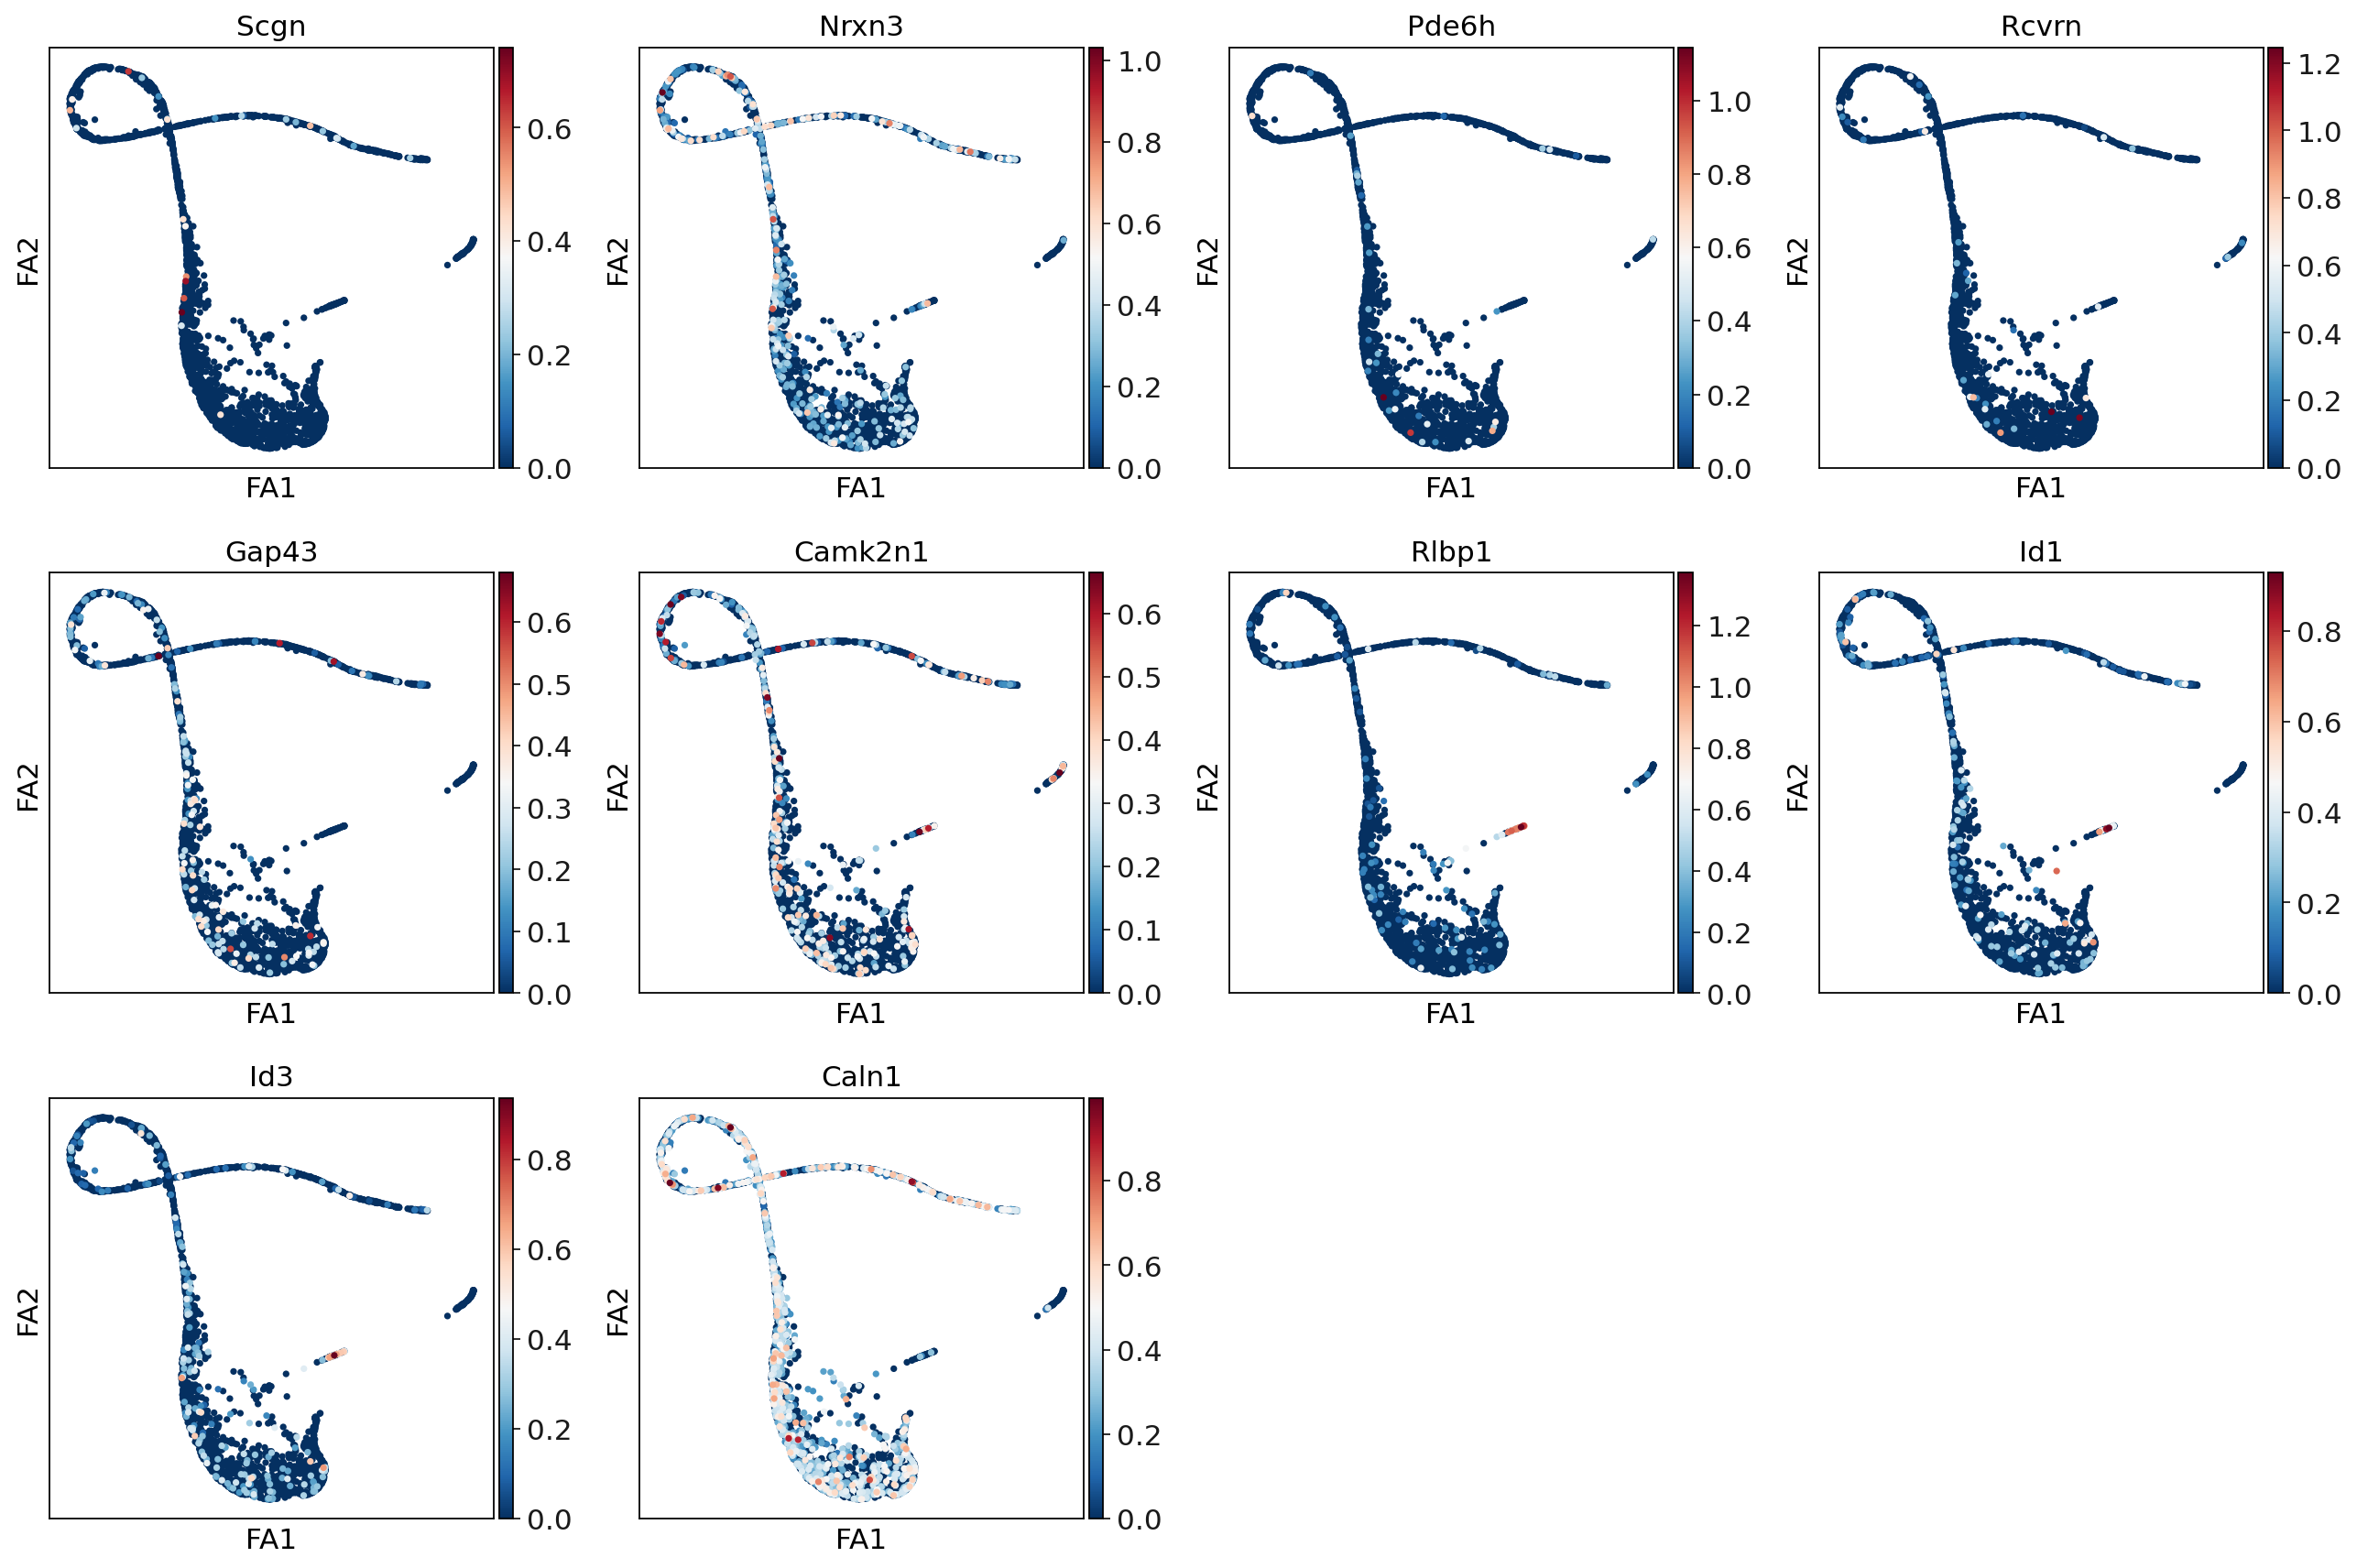

In [250]:
sc.set_figure_params()
sc.pl.draw_graph(mgtotal_late,color=['Scgn','Nrxn3','Pde6h','Rcvrn','Gap43','Camk2n1','Rlbp1','Id1','Id3','Caln1'], use_raw = False, layout = 'fa',color_map="RdBu_r")

In [172]:
scf.tl.tree(mgtotal,method="ppt",Nodes=200,use_rep="palantir",
            device="cpu",seed=1,ppt_lambda=100,ppt_sigma=0.025,ppt_nsteps=200)

inferring a principal tree --> parameters used 
    200 principal points, sigma = 0.025, lambda = 100, metric = euclidean
    fitting:  93%|███████████████████████████████████████████████████████████████▏    | 186/200 [00:08<00:00, 22.70it/s]
    converged
    finished (0:00:08) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [182]:
scf.tl.tree(mgtotal,method="ppt",Nodes=400,use_rep="palantir",
            device="cpu",seed=1,ppt_lambda=10,ppt_sigma=0.025,ppt_nsteps=100)

inferring a principal tree --> parameters used 
    400 principal points, sigma = 0.025, lambda = 10, metric = euclidean
    fitting: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.84it/s]
    not converged (error: 0.01835688130508653)
    more than 30 tips detected!
    finished (0:00:08) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


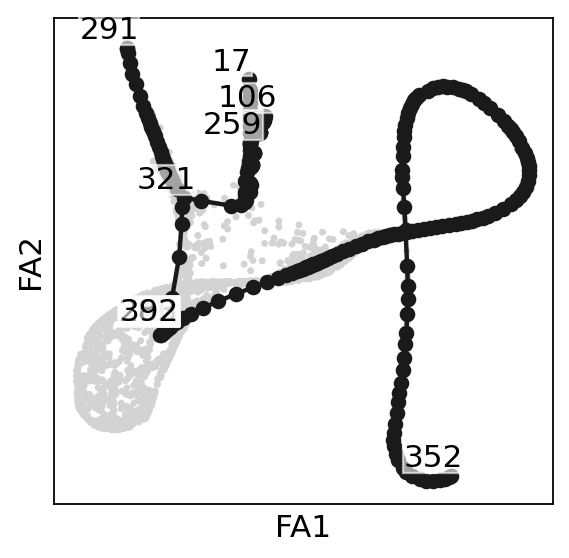

In [183]:
scf.pl.graph(mgtotal)

In [184]:
scf.tl.root(mgtotal,392)

node 392 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [185]:
scf.tl.pseudotime(mgtotal,n_jobs=20,n_map=100,seed=42)

projecting cells onto the principal graph
    mappings: 100%|███████████████████████████████████████████████████████████████████| 100/100 [02:17<00:00,  1.38s/it]


ValueError: Unable to coerce to DataFrame, shape must be (2, 84): given (2, 96)

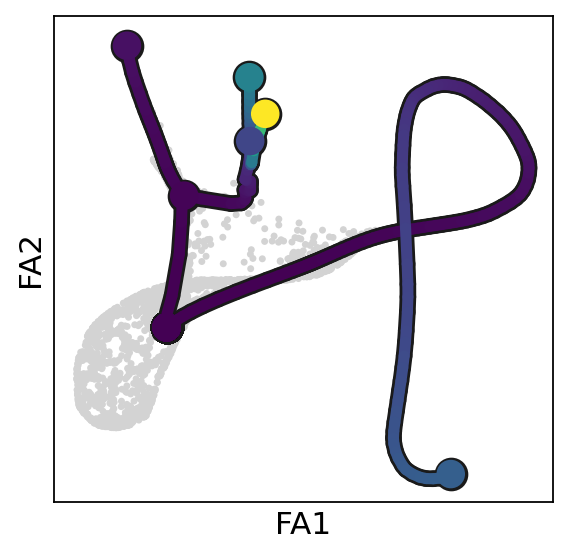

In [186]:
scf.pl.trajectory(mgtotal)

In [207]:
scf.tl.test_association(mgtotal,n_jobs=20)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [191]:
mgtotal.obs

,leiden,t,seg,edge,t_sd
AAACCCAAGCACTGGA-1,11,1.093758,75,281|34,2.545976e-02
AAACCCACATCCGGCA-1,8,0.086965,96,306|53,8.229609e-02
AAACCCAGTATTCCGA-1,2,0.004001,75,27|169,1.453972e-02
AAACCCAGTGACTAAA-1,14,4.438370,4,17|326,8.881784e-16
AAACGAAAGGAAACGA-1,23,0.054119,75,376|282,1.067300e-01
...,...,...,...,...,...
TTTGTTGAGTGTCATC-1,14,2.798893,4,140|348,8.881784e-16
TTTGTTGCAATTAGGA-1,9,0.013375,75,333|7,2.654479e-02
TTTGTTGCAGTGCGCT-1,12,2.393588,75,45|345,2.841393e-02
TTTGTTGGTCTGCGCA-1,11,1.446695,75,395|101,3.291183e-02


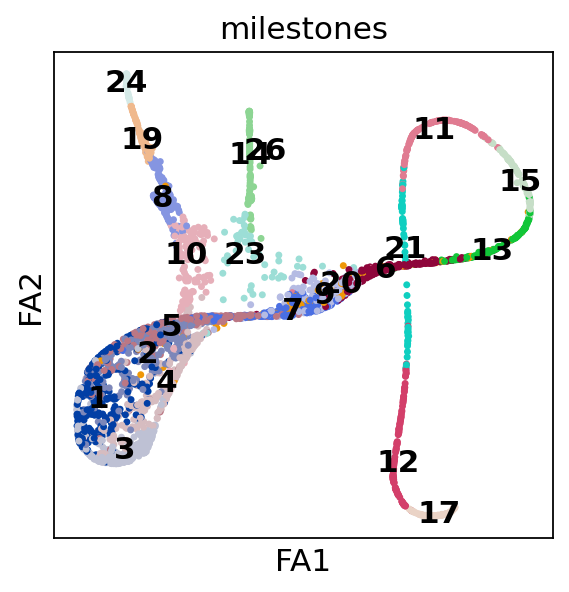

In [204]:
sc.pl.draw_graph(mgtotal,color=["milestones"], legend_loc = 'on data')

In [ ]:
scf.tl.test_fork(mgtotal,root_milestone="Root",milestones=["DC","Mono","Ery"],n_jobs=20,rescale=True)

In [199]:
mgtotal.uns["milestones_colors"][3]="#17bece"

In [202]:
mgtotal.obs['milestones'] = mgtotal.obs['leiden']

In [211]:
import pandas as pd
mgtotal.obs['leiden'] = mgtotal.obs['leiden'].astype(str)
old_to_new = {
'1':'Transitory',
'2':'Transitory',
'3':'Transitory',
'4':'Transitory',
'5':'Transitory',
'6':'MG',
'7':'Transitory',
'8':'RGC',
'9':'Transitory',
'10':'Transitory',
'11':'MG',
'12':'MG',
'13':'MG',
'14':'Cones',
'15':'MG',
'17':'MG',
'19':'RGC',
'20':'Transitory',
'21':'MG',
'23':'Transitory',
'24':'RGC',
'26':'Neurons',}
mgtotal.obs['milestones'] = (
mgtotal.obs['leiden']
.map(old_to_new).astype('category')
)

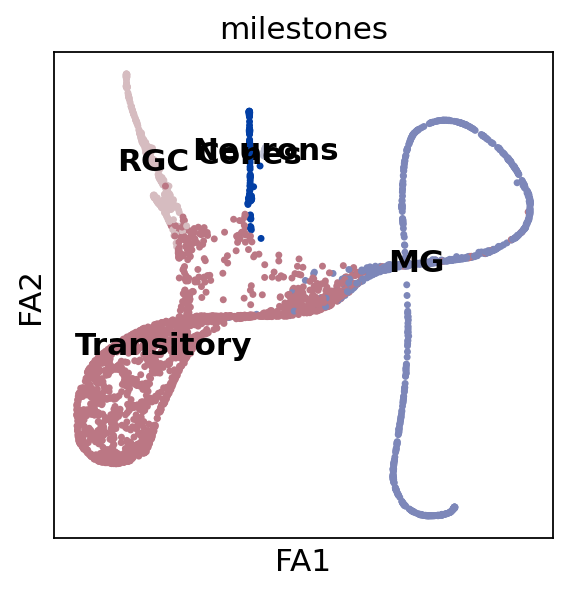

In [212]:
sc.pl.draw_graph(mgtotal,color=["milestones"], legend_loc = 'on data')

In [210]:
scf.tl.test_fork(mgtotal,root_milestone="Transitory",milestones=["RGC","Cones-neurons","MG"],n_jobs=20,rescale=True)

testing fork


KeyError: 'milestones'